In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)

In [3]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0886110901_PN33grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.941e-03 +/- 1.068e-03 (37.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.776e+04 sec
 Using fit statistic: chi
 Using Background File                0886110901_PN33spec_bkg.fits
  Background Exposure Time: 1.776e+04 sec
 Using Response (RMF) File            0886110901_PN33spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886110901_PN33spec.arf



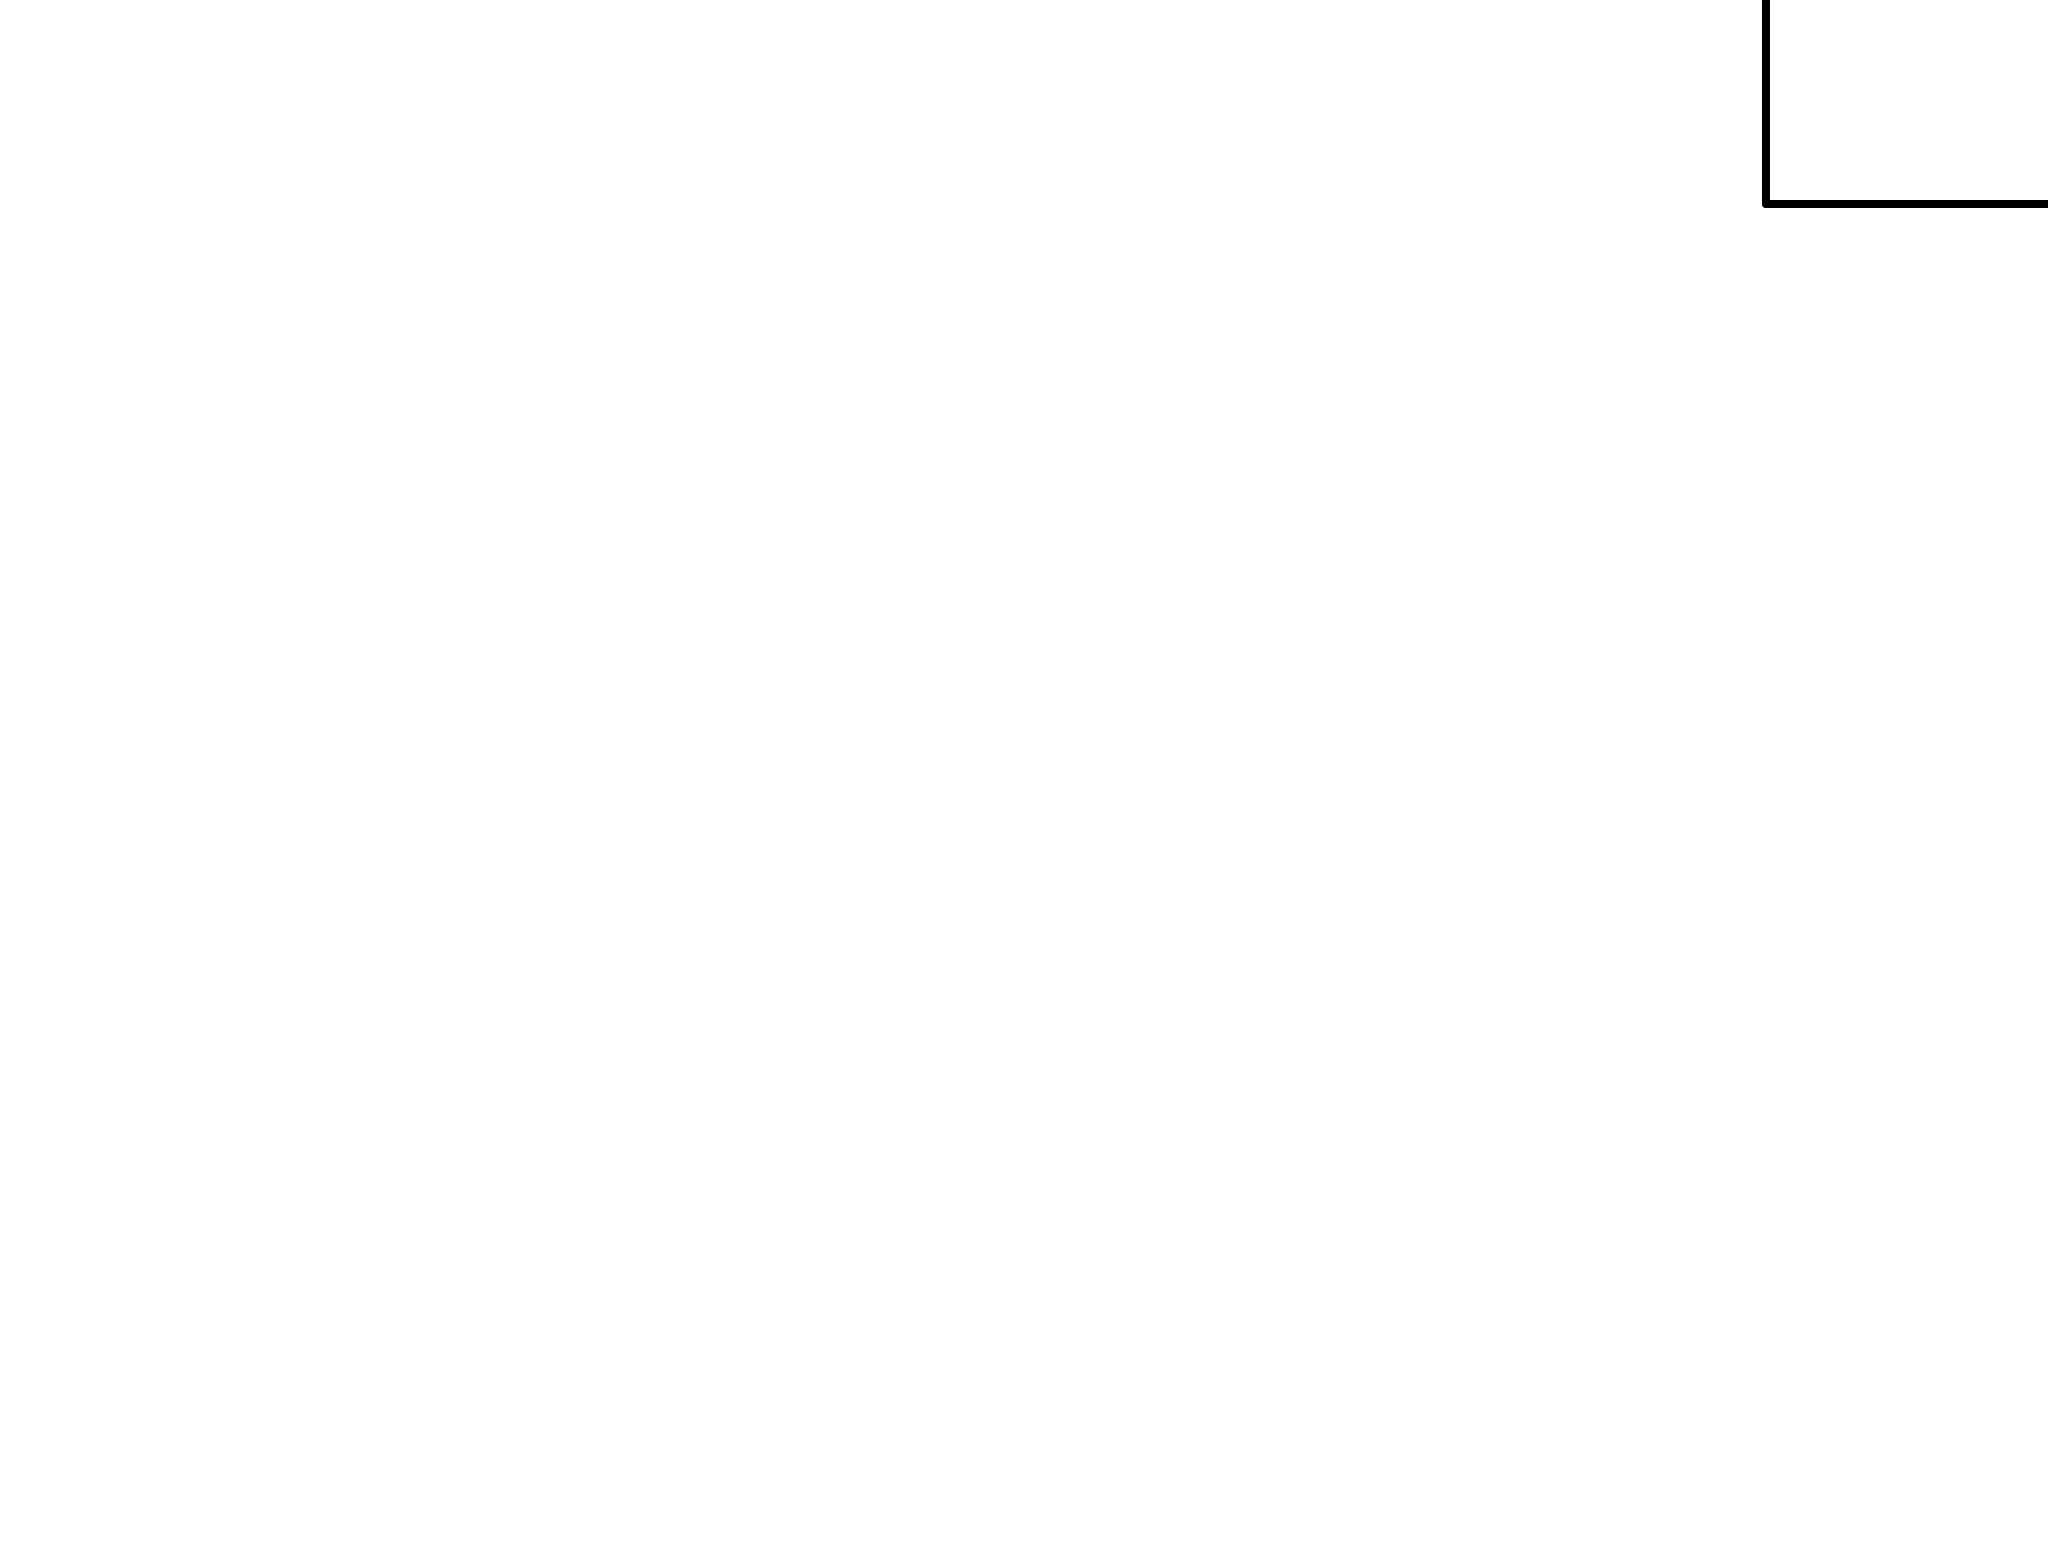

In [4]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

     3 channels (1-3) ignored in spectrum #     1
     1 channels (10) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross se

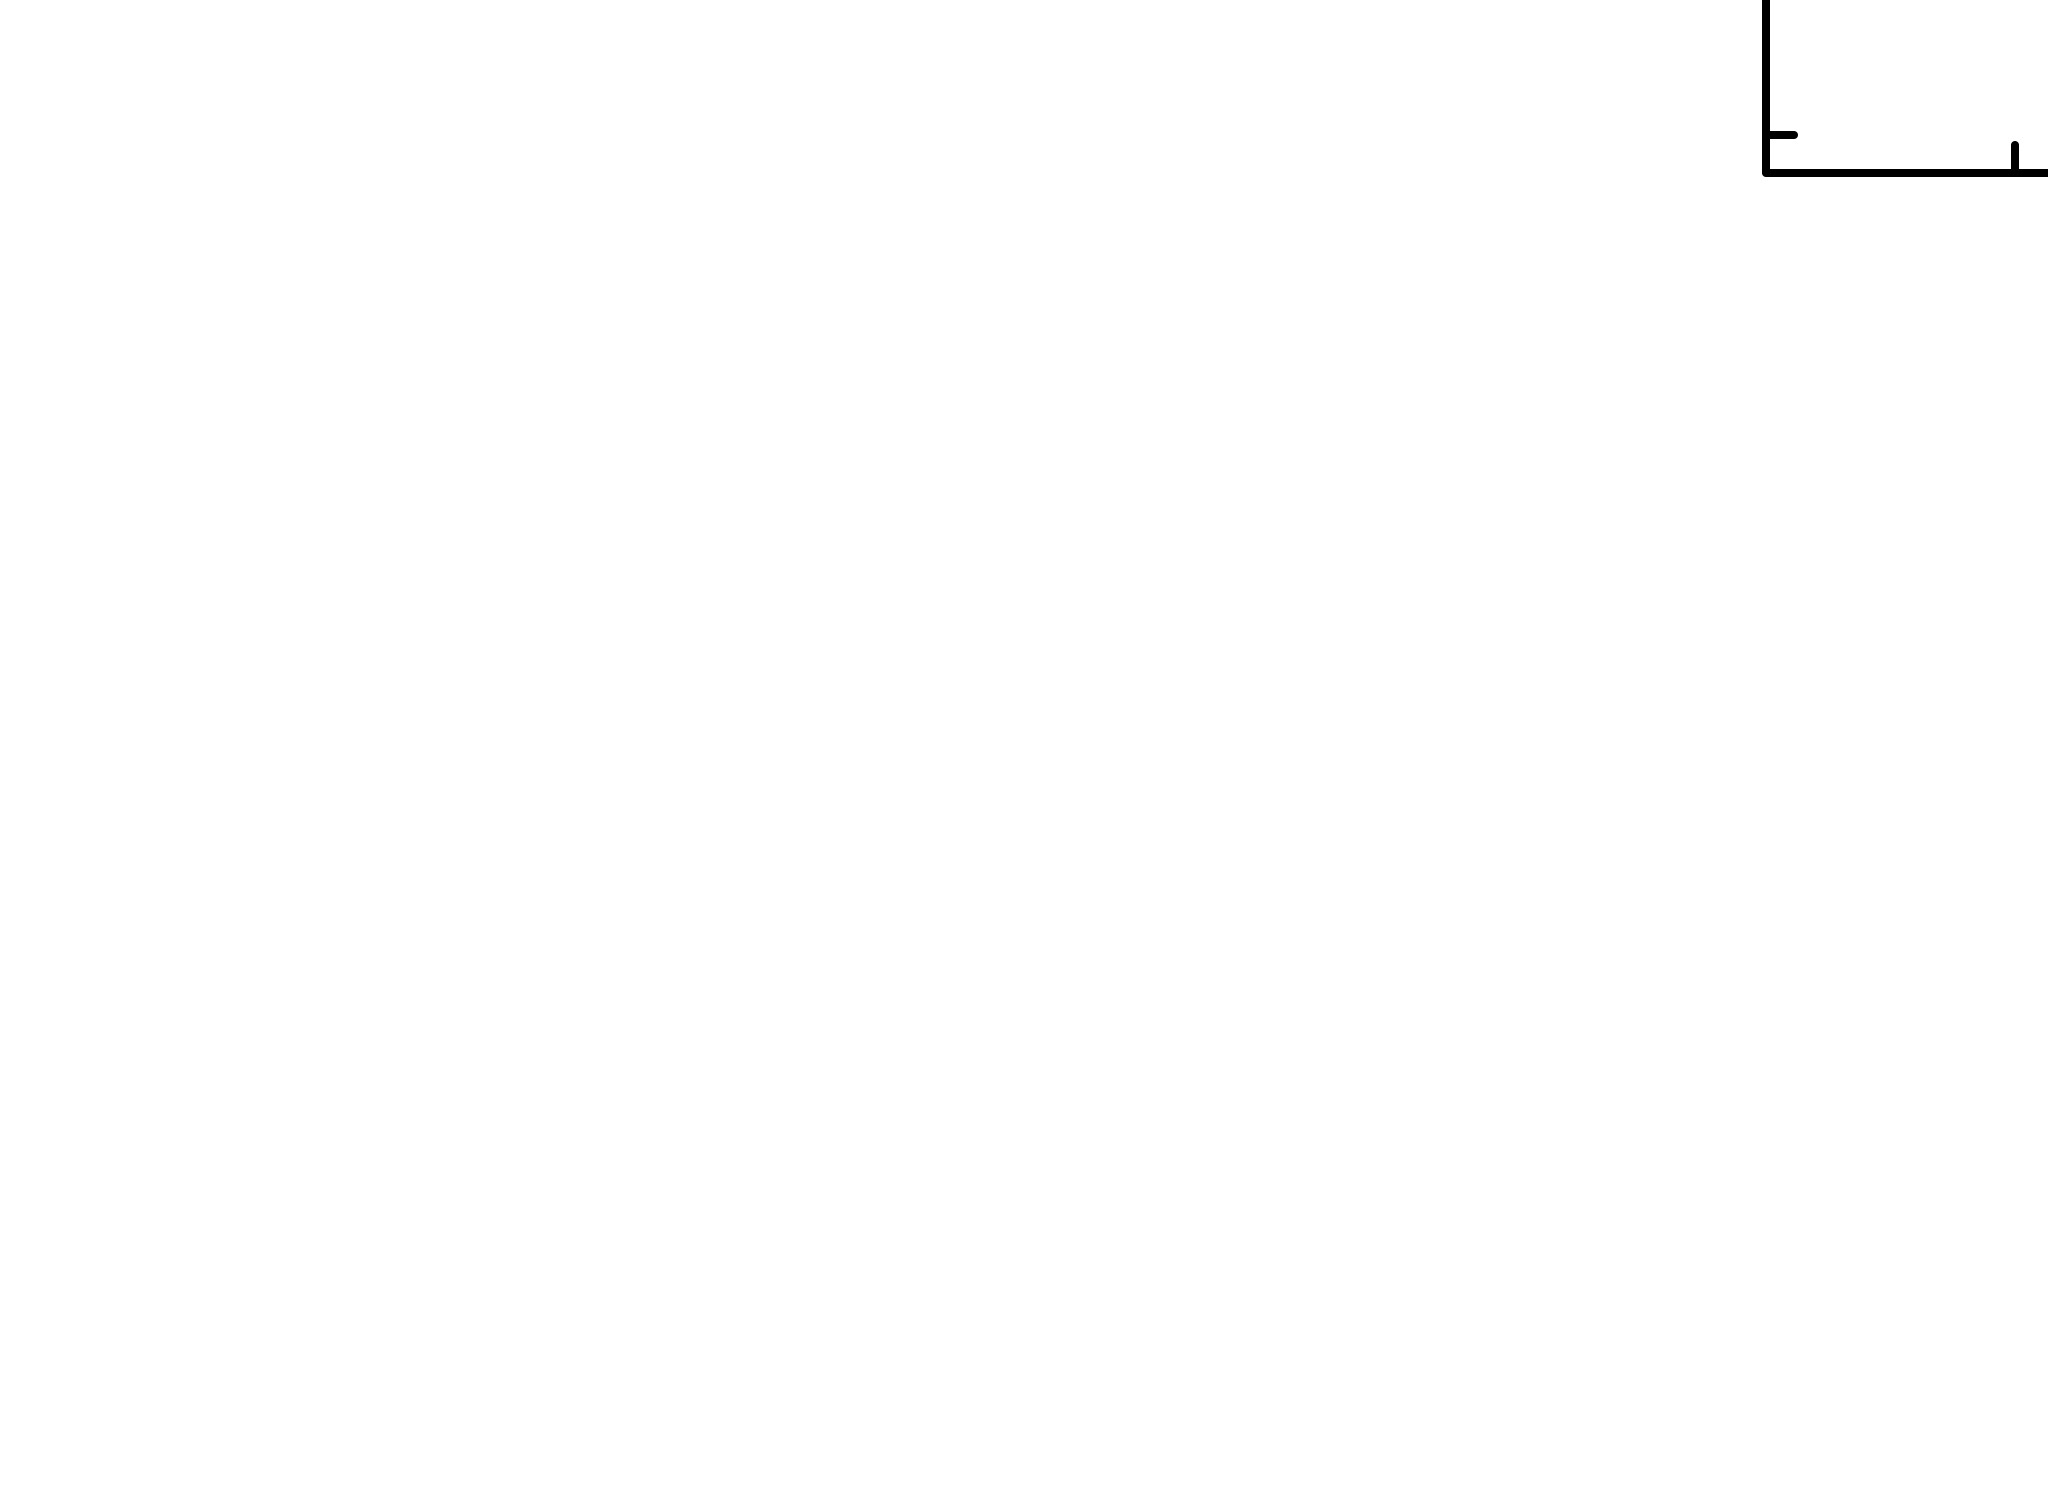

In [5]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [6]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? ***Warning: Identical values of the parameter give different values of the statistic.
Please check your res


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.033400e+11     using 6 bins.

Test statistic : Chi-Squared              3.033400e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
3.14412      0.334624      0      0.302756       1.10959   2.45196e-06
2.04666      131446       -1      0.151309       1.30520   2.56917e-06
1.32724      158949       -2      0.244106       1.95222   4.73140e-06
1

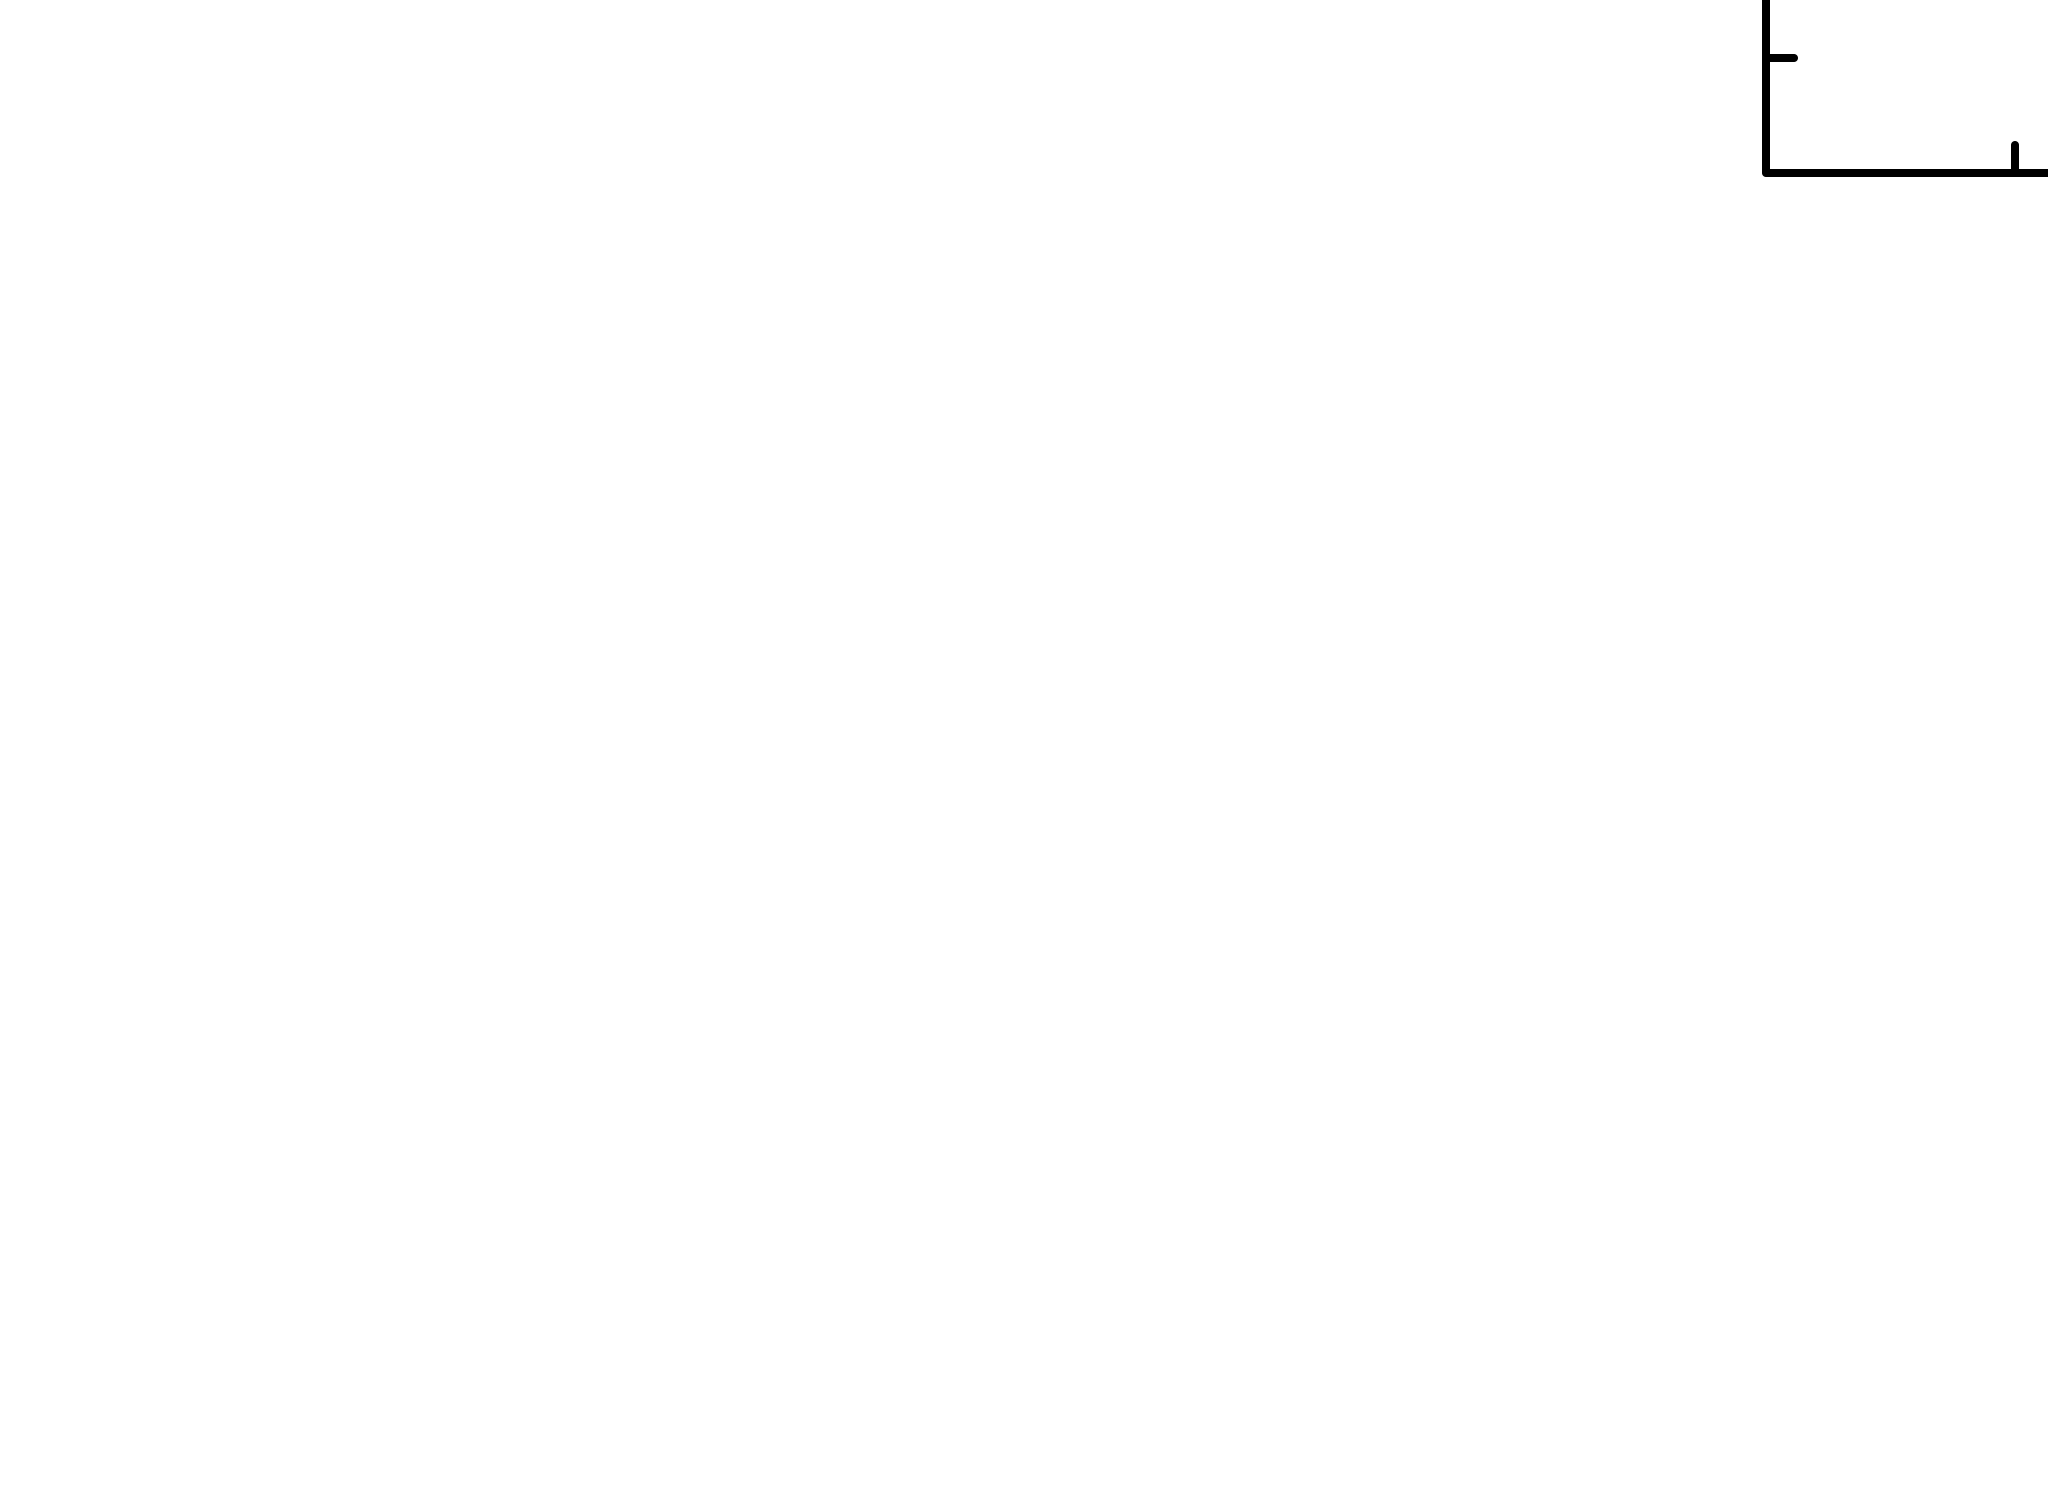

In [7]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [8]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting?      1            0       3.4395    (-0.593577,2.84592)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 10, with delta statistic: 0.104191

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2     0.300125            0    (-3.47544,-3.77557)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.673875e+10     using 6 bins.

Test statistic : Chi-Squared              4.673875e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.97177      0.433187     -2     0.0995886       38.6930   3.15664e-06
1.70797      160890       -1      0.128410       15.2933   4.43303e-06
1.4224       73301        -1      0.151535       6.46346   5.01142e-06
1.3

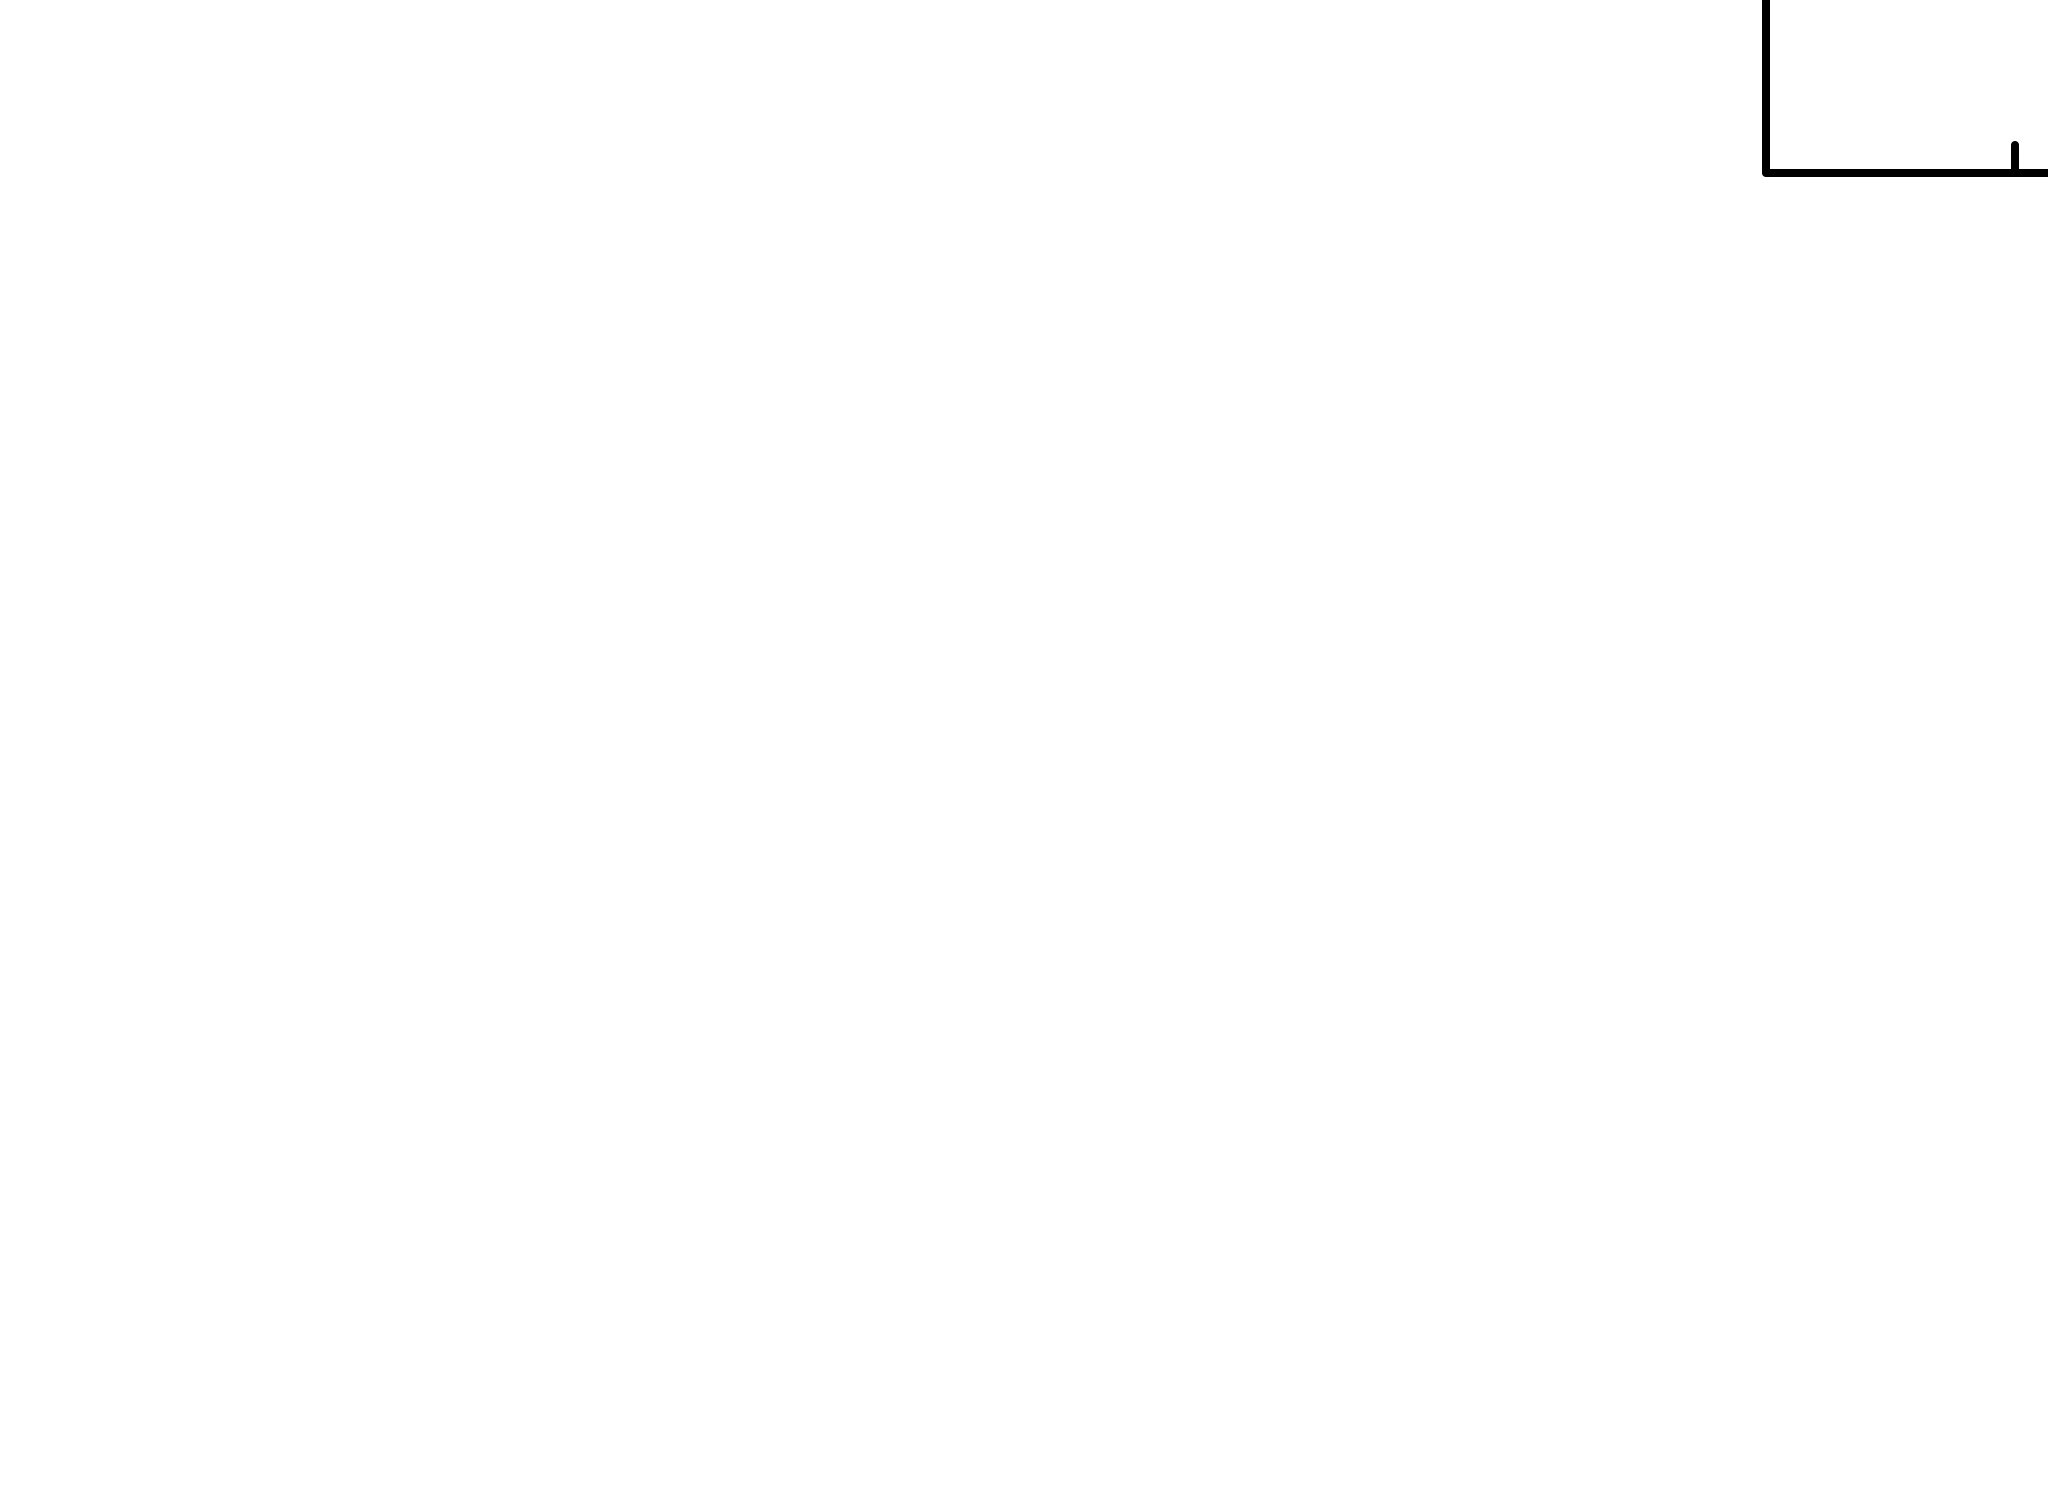

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [10]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.20986      0.137464     -2      0.350413       1.04781   1.49976e-05
 Variances and Principal Axes
                 1        2        3  
 2.1716E-11| -0.0000   0.0000   1.0000  
 6.3818E-02|  0.9907   0.1362   0.0000  
 6.8424E+00| -0.1362   0.9907  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   1.896e-01  -9.146e-01   1.115e-05
  -9.146e-01   6.717e+00  -6.879e-05
   1.115e-05  -6.879e-05   7.749e-10
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.350413     +/-  0.435375     
   2    2   bremss     kT         keV      1.04781      +/-  2.59165      
   3    2   bremss     norm                1.49976E-05  +/-  2.78367E-05 


***XSPEC Error:  No variable parameters for fit 

of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials 


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.343750e+10     using 6 bins.

Test statistic : Chi-Squared              1.343750e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
1.01429      0.381641      0      0.986301      0.822978   2.1

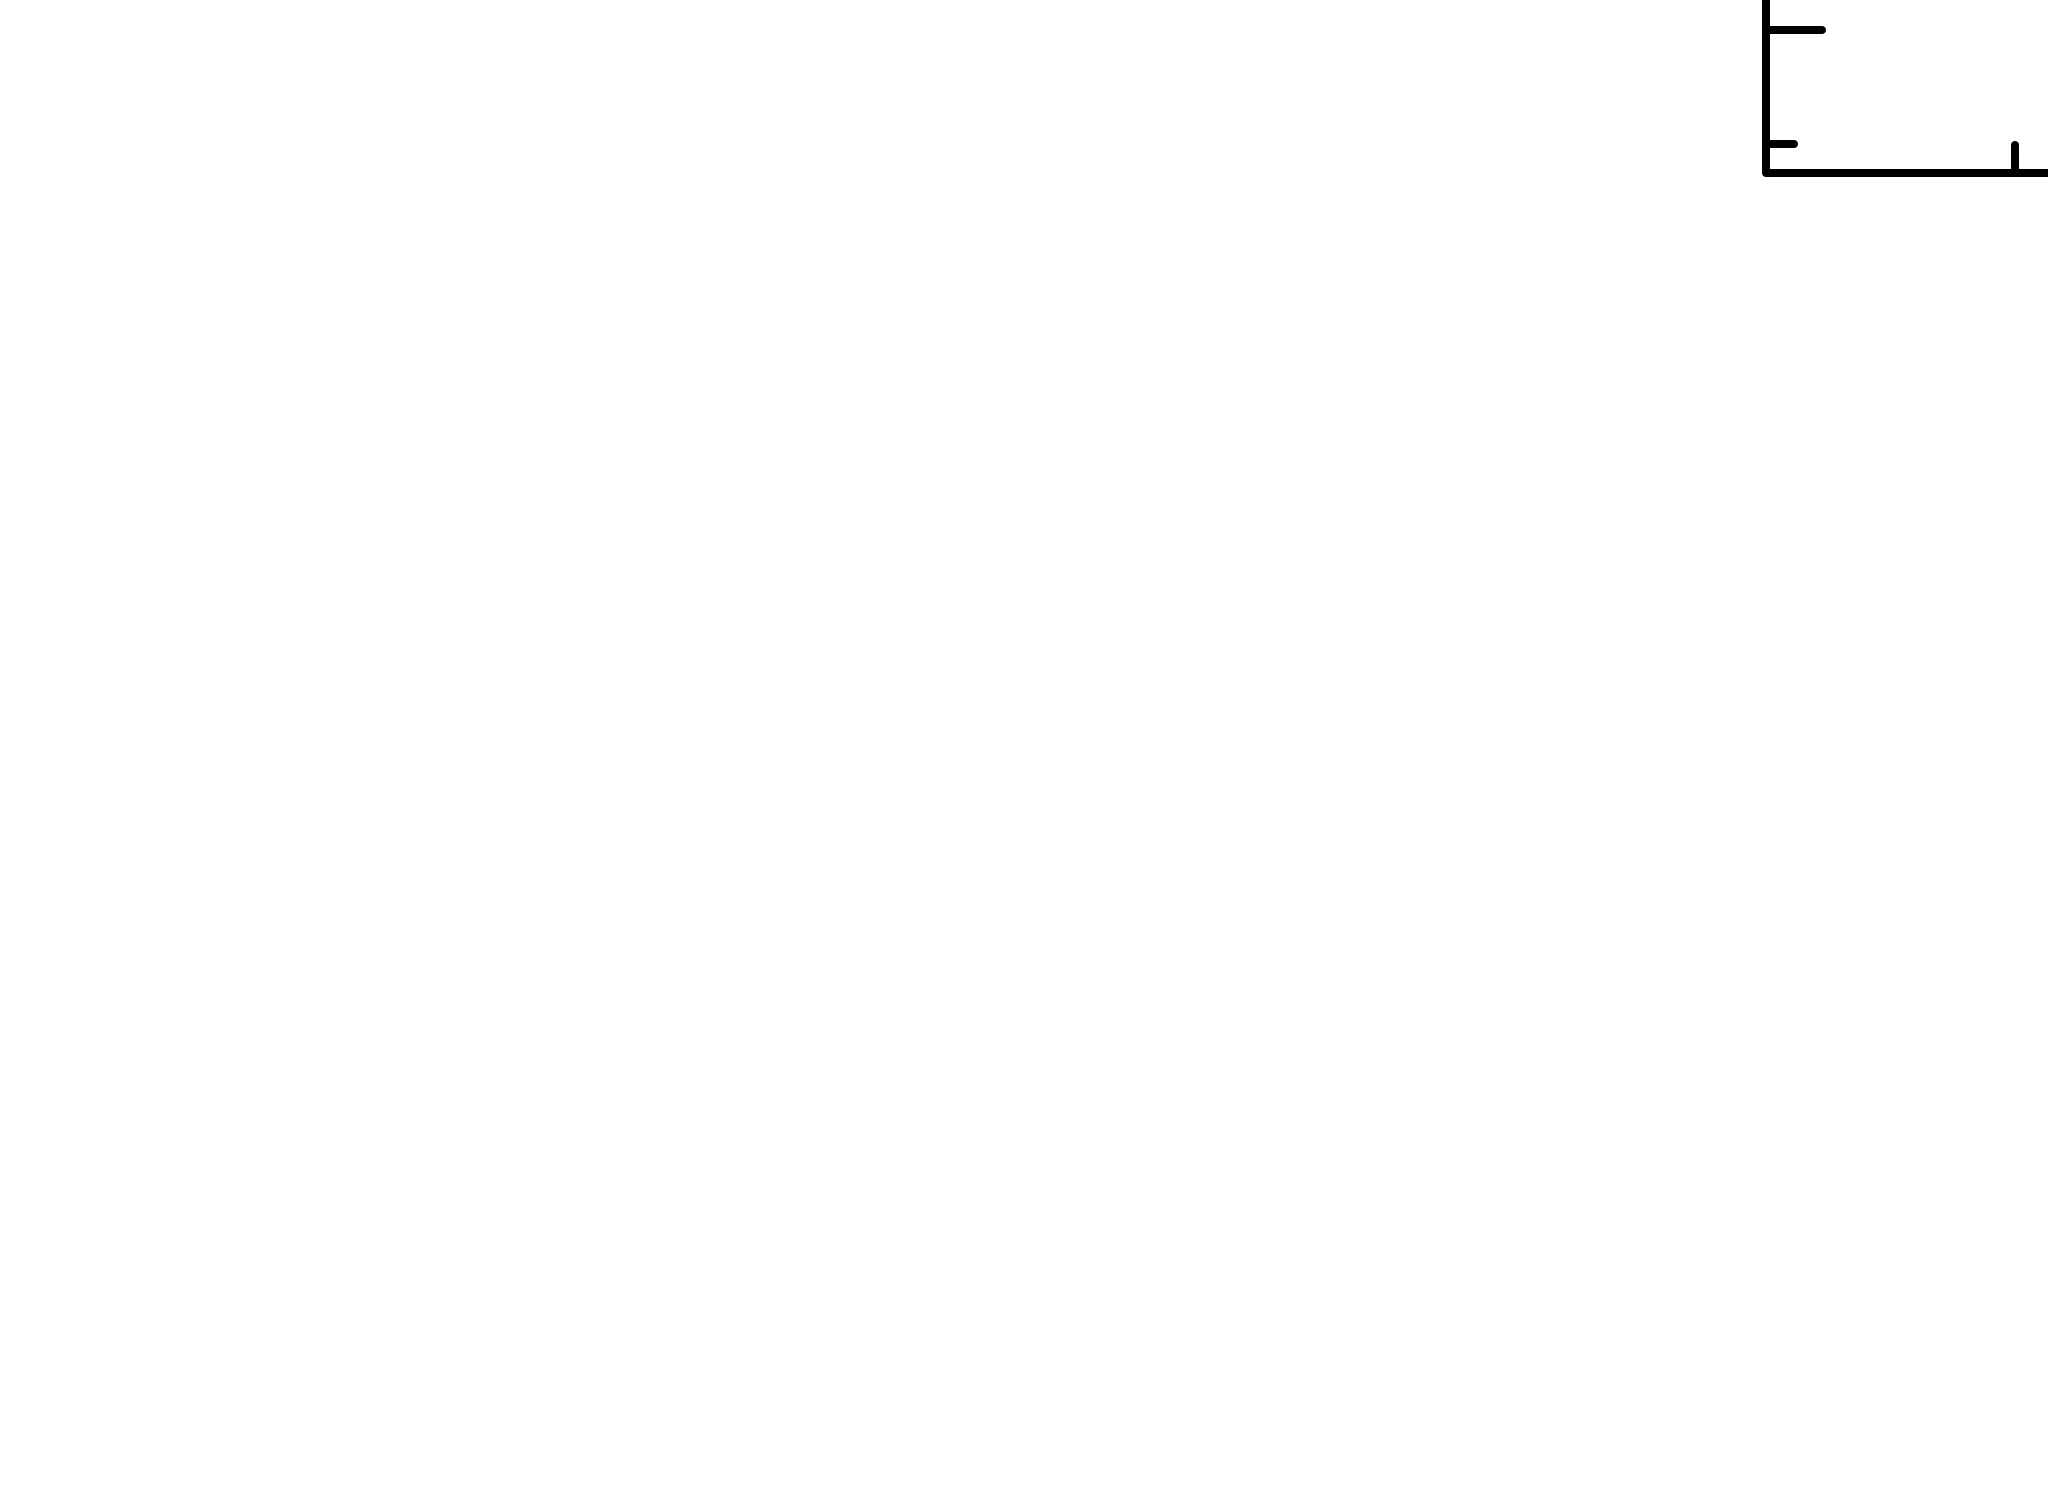

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [12]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Apparent non-monotonicity in statistic space detected.
Current bracket values 2.04632, 4.61335
and delta stat 0.91246, 5.84021
but latest trial 3.24658 gives 0.870789
Suggest that you check this result using the steppar command.
     1            0      3.32983    (-0.802789,2.52705)
 Parameter   Confidence Range (2.706)
Number o

In [13]:
np.savetxt('spec44_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [14]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.6664e-06 photons (1.1561e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [15]:
#plx = 1.4843
d_kpc = 8
F_x = 1.4639*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.1206574113232897e+33


In [16]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.04947286762488


In [17]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.4243221117156145
